# Piano network
Like how piano splits out different sound from different buttons(left to right).

In [9]:
from keras.layers import Conv2D, Dense, Activation, Input, Reshape, Merge, Concatenate, merge, add,
from keras.models import Sequential, Model
from keras.datasets import mnist
from keras.utils import to_categorical

In [4]:
data = mnist.load_data()

In [5]:
(xtrain, ytrain), (xtest, ytest) = data

In [6]:
xtrain_reshaped = xtrain.reshape(xtrain.shape + (1,))
xtest_reshaped = xtest.reshape(xtest.shape + (1,))
ytrain_cat, ytest_cat = list(map(lambda x:to_categorical(x, num_classes=10), [ytrain, ytest]))

In [12]:
input_layer = Input(shape = xtrain_reshaped.shape[1:])
conv_1 = Conv2D(kernel_size=3, filters=1, activation='tanh')(input_layer)
conv_2 = Conv2D(kernel_size=3, filters=1, activation='relu')(conv_1)
conv_3 = Conv2D(kernel_size=3, filters=1, activation='tanh')(conv_2)
conv_4 = Conv2D(kernel_size=3, filters=1, activation='relu')(conv_3)
conv_5 = Conv2D(kernel_size=3, filters=1, activation='tanh')(conv_4)
conv_6 = Conv2D(kernel_size=3, filters=1, activation='relu')(conv_5)
conv_7 = Conv2D(kernel_size=3, filters=1, activation='tanh')(conv_6)
reshape_1 = Reshape((-1,))(conv_1)
reshape_2 = Reshape((-1,))(conv_2)
reshape_3 = Reshape((-1,))(conv_3)
reshape_4 = Reshape((-1,))(conv_4)
reshape_5 = Reshape((-1,))(conv_5)
reshape_6 = Reshape((-1,))(conv_6)
reshape_7 = Reshape((-1,))(conv_7)
# merge_1 = Merge(list(map(lambda x:Model(input_layer, x),
#                          [reshape_1, reshape_2, reshape_3, reshape_4])), mode = 'concat')
concat_1 = merge([reshape_1, reshape_2, 
                  reshape_3, reshape_4, 
                  reshape_5, reshape_6, reshape_7], mode='concat')
dense_1 = Dense(units = 512,  activation='relu')(concat_1)
dense_1 = Dense(units = 256,  activation = 'sigmoid')(dense_1)
output_layer = Dense(units = 10,  activation = 'sigmoid')(dense_1)
model = Model(input_layer, output_layer)
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 26, 26, 1)    10          input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 24, 24, 1)    10          conv2d_29[0][0]                  
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 22, 22, 1)    10          conv2d_30[0][0]                  
__________________________________________________________________________________________________
conv2d_32 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/usr/local/lib/python3.6/dist-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [41]:
model.fit(xtrain_reshaped, ytrain_cat, epochs=1, batch_size=500, validation_data=(xtest_reshaped, ytest_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 71s 1ms/step - loss: 1.5562e-04 - acc: 1.0000 - val_loss: 0.1495 - val_acc: 0.9760


In [37]:
m = Model(input_layer, conv_3)
m.compile(loss="mse", optimizer='rmsprop')

In [38]:
imgs = m.predict(xtest_reshaped[:10])

In [39]:
import matplotlib.pyplot as plt

7


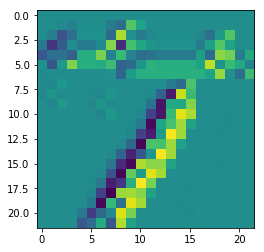

2


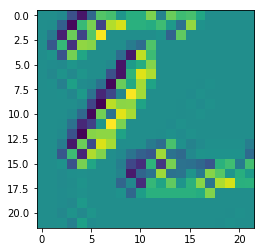

1


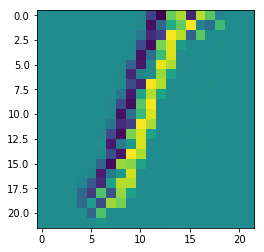

0


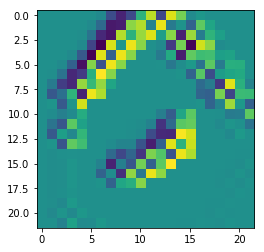

4


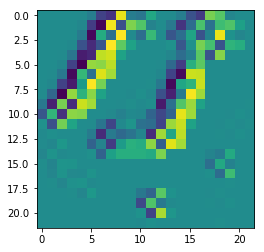

1


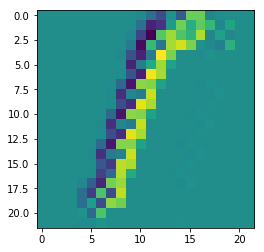

4


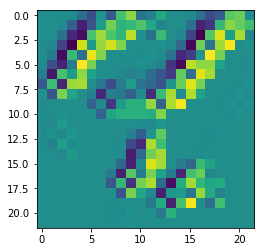

9


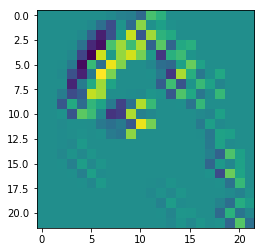

5


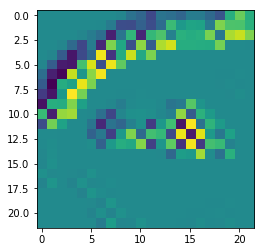

9


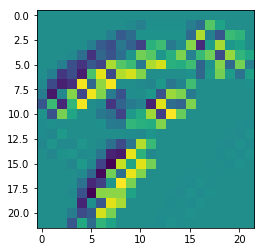

In [40]:
for img, pred in zip(imgs, ytest[:10]):
    print(pred)
    plt.imshow(img.reshape(img.shape[:2]))
    plt.show()

In [42]:
model.save_weights("weights")